In [1]:
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
import string
from wordcloud import WordCloud

# Strategy: Word focused
If the vocabulary is what you are looking at, the next step is to remove the punctuation and the stopwords. 

With the following code, we are going to generate a list of words used in the `Body` column. It won't be extremely useful for the classification task but comparing vocabulary can be very revealing (given the right subset: spam vs. regular emails,etc.).

Once we have a list of words, we can start the vocabulary analysis by coding a counter or using `FreqDist` from the `nltk` library for example.

In [2]:
df = pd.read_csv('data/processed/data.csv', index_col='Id')
df['Body'].fillna(value='code', inplace=True)

# Word frequency for the whole dataset

In [3]:
allwords = {}
for observation in df['Body']:
    for word in observation.split():
        allwords[word] = allwords.get(word,0) + 1

Because of the way we cleaned the text, there is an over representation of the word "code". Lets' get rid of it. (It might be a good idea to see if there is any correlation between the quality of a question and how much code, if any, is posted)

In [4]:
allwords.pop('code')

331857

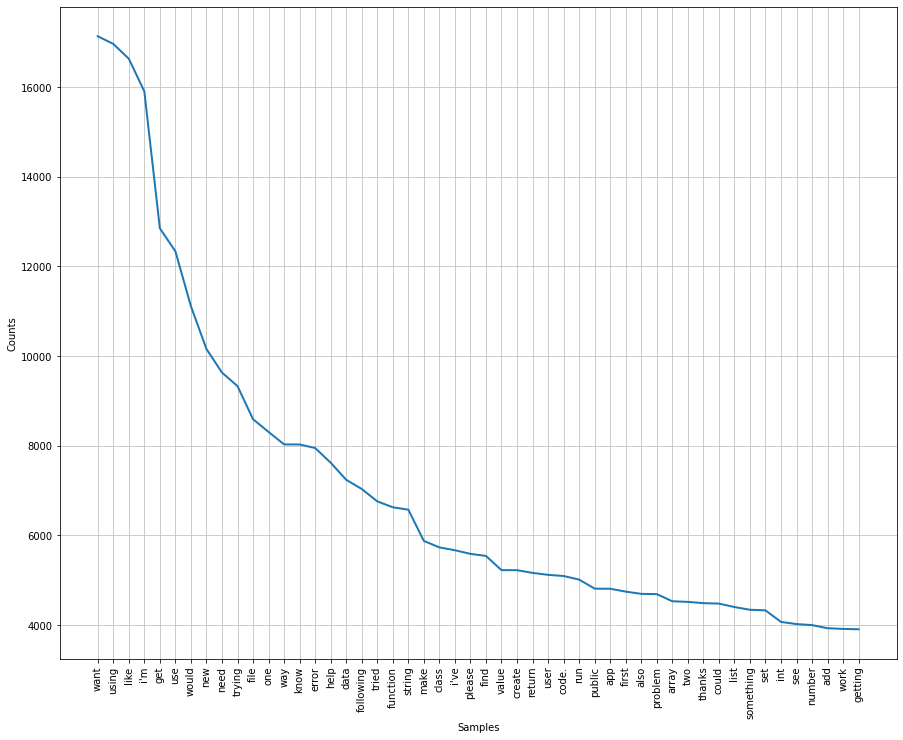

In [5]:
plt.figure(figsize=(15,12))
FreqDist(allwords).plot(50);

In [6]:
vocab_size = 0
for i in allwords.values():
    if i != 1:
        vocab_size += 1
vocab_size

73747

# Word frequency for the HQ questions

In [7]:
words_hq = {}
for observation in df['Body'][df['Y'] == 'HQ']:
    for word in observation.split():
        words_hq[word] = words_hq.get(word,0) + 1

In [8]:
words_hq.pop('code')

49901

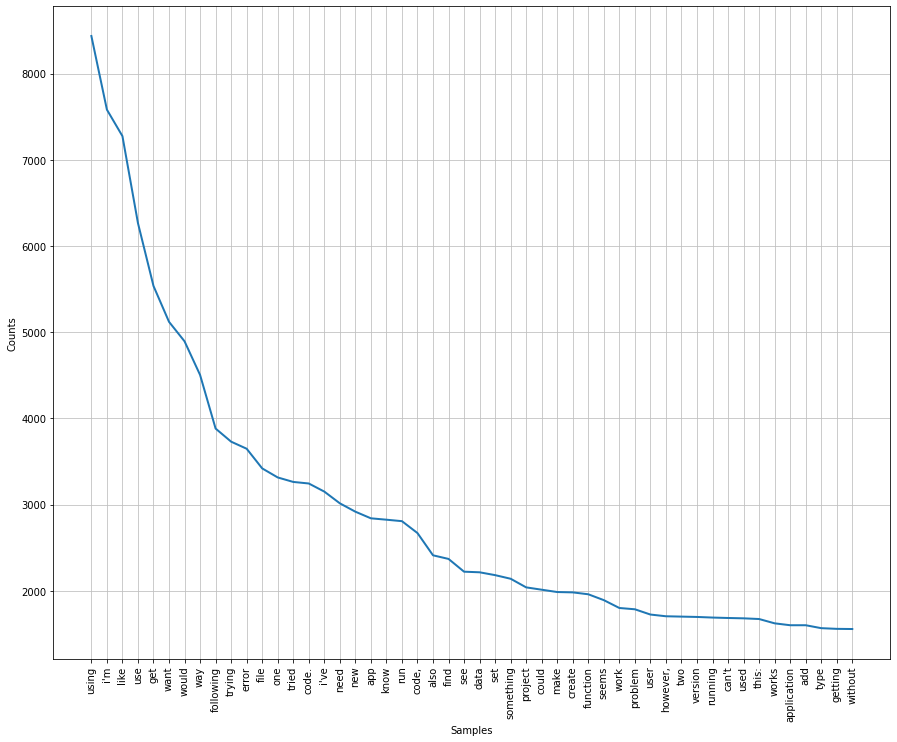

In [9]:
plt.figure(figsize=(15,12))
FreqDist(words_hq).plot(50);

## Word frequency for LQ_EDIT questions

In [10]:
words_lqe = {}
for observation in df['Body'][df['Y'] == 'LQ_EDIT']:
    for word in observation.split():
        words_lqe[word] = words_lqe.get(word,0) + 1

In [11]:
words_lqe.pop('code')

253298

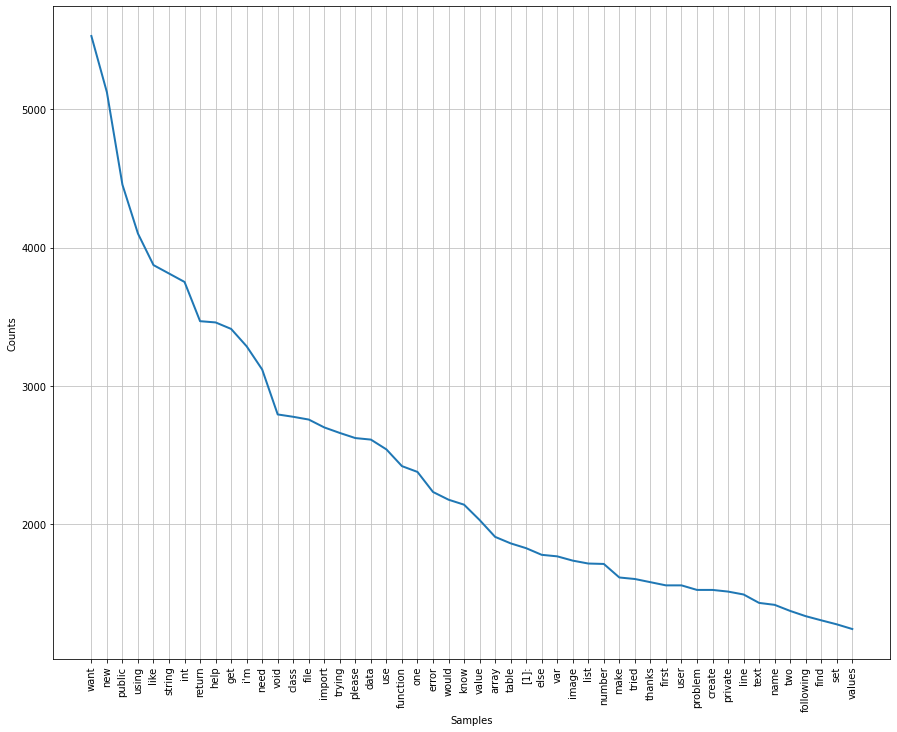

In [12]:
plt.figure(figsize=(15,12))
FreqDist(words_lqe).plot(50);

## Word frequency for LQ_CLOSE questions

In [13]:
words_lqc = {}
for observation in df['Body'][df['Y'] == 'LQ_CLOSE']:
    for word in observation.split():
        words_lqc[word] = words_lqc.get(word,0) + 1

In [14]:
words_lqc.pop('code')

28658

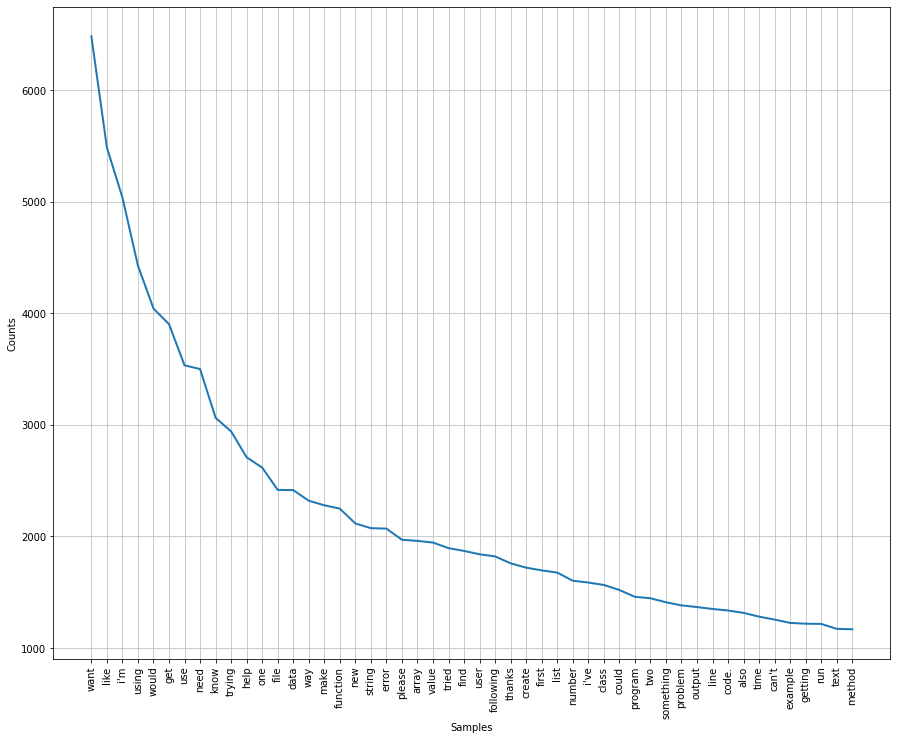

In [15]:
plt.figure(figsize=(15,12))
FreqDist(words_lqc).plot(50);

Or if you want to do a document analysis (like a TF-IDF type of analysis), you can use a lambda function to alter data in the dataframe.

## Wordcloud
Wordclouds are to text data what pie charts are to numerical data. They are at best confusing and at worst useless. But it can be generate a nice picture for your article header :)

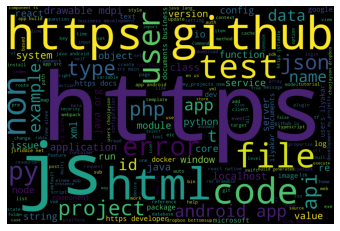

In [16]:
wordcloud = WordCloud(width = 3000,
                      height = 2000
                     )

wordcloud.generate(" ".join(words_hq.keys()))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

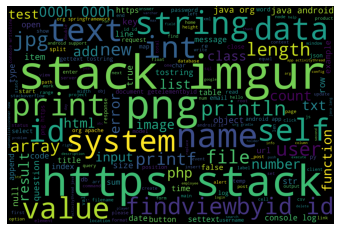

In [17]:
wordcloud = WordCloud(width = 3000,
                      height = 2000
                     )

wordcloud.generate(" ".join(words_lqe.keys()))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

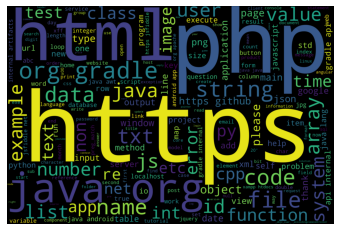

In [18]:
wordcloud = WordCloud(width = 3000,
                      height = 2000
                     )

wordcloud.generate(" ".join(words_lqc.keys()))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Stemming
This process is going to remove the ending of the words, shrinking them to their stem, their common denominator. For example, in the following list:
- programmer
- programmation
- programmed
- programming
- program
- programme

The stem of these words is **program**. It is easy to imagine a stemmed document being harder to read (by a human at least) but at the same time, it is going to be easier to compare different documents. This "normalization" is going to help make a model more robust as the ambiguity is reduced.

It is worth noting:
- there are a lot of stemming algorithms, available in various languages. [nltk.stem API module](https://www.nltk.org/api/nltk.stem.html) will give you a list of stemming classes available with NLTK.
- whilst stemming simplifies a document, it also creates "new" noise:  the stem for "flies" is "fli" for example.
- whilst stemming simplifies a document, it will induce a loss of information. For example, in the "program" list above, programme is the British spelling and program, the American spelling. If the origin of the review is not an important information for your analysis: Great, stemming has made this simpler! However if the localisation is key to your problem, you might miss some nuances by stemming your documents.

In [19]:
stemmer = SnowballStemmer("english")

In [20]:
def stem(document):
    stemmed = ''
    for word in document.split():
        stemmed += stemmer.stem(word) + ' '
        
    return stemmed

In [21]:
df['Stemmy'] = df['Body'].apply(lambda x:stem(x))

## Lemmatisation

In [22]:
wnl = WordNetLemmatizer()

In [23]:
def lem(document):
    lemmed =  ''
    for word in document.split():
        lemmed += wnl.lemmatize(word) + ' '
        
    return lemmed

In [24]:
df['Lemmy'] = df['Body'].apply(lambda x:lem(x))

## Question Length

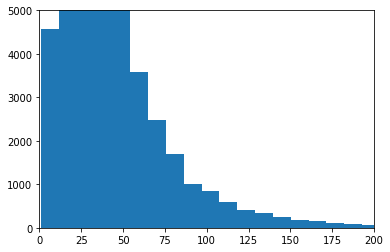

In [25]:
plt.hist([len(i) for i in df['Body'].str.split()], bins=500);
plt.xlim(0,200);
plt.ylim(0,5_000);

## Saving the processed dataset to a `.csv`

In [27]:
df.to_csv('data/processed/data_with_stem_lem.csv')

In [28]:
df

,Title,Body,Tags,CreationDate,Y,Stemmy,Lemmy
Id,,,,,,,
34552656,Java: Repeat Task Every Random Seconds,i'm already familiar repeating tasks every sec...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,i'm alreadi familiar repeat task everi second ...,i'm already familiar repeating task every seco...
34552974,How to get all the child records from differen...,different tables like code code select item co...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,differ tabl like code code select item code co...,different table like code code select item cod...
34553034,Why are Java Optionals immutable?,i'd like understand java optionals designed im...,<java><optional>,2016-01-01 02:03:20,HQ,i'd like understand java option design immutab...,i'd like understand java optionals designed im...
34553174,Text Overlay Image with Darkened Opacity React...,attempting overlay title image image darkened ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,attempt overlay titl imag imag darken lower op...,attempting overlay title image image darkened ...
34553318,Why ternary operator in swift is so picky?,"question simple, could find answer! code compi...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"question simple, could find answer! code compi...","question simple, could find answer! code compi..."
...,...,...,...,...,...,...,...
60467932,C++ The correct way to multiply an integer and...,try multiply integer double obtain wrong resul...,<c++>,2020-02-29 17:46:41,LQ_CLOSE,tri multipli integ doubl obtain wrong result. ...,try multiply integer double obtain wrong resul...
60468018,How can I make a c# application outside of vis...,i'm new programming i'm teaching myself. made ...,<c#><visual-studio>,2020-02-29 17:55:56,LQ_CLOSE,i'm new program i'm teach myself. made calcul ...,i'm new programming i'm teaching myself. made ...
60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*urls.py* code django.contrib import admin cod...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT,*urls.py* code django.contrib import admin cod...,*urls.py* code django.contrib import admin cod...
